## **DeepTensor 🔥**

A minimal PyTorch-like **deep learning library** focused on custom autograd and efficient tensor operations.


### **Features at a Glance** 🚀

- **Automatic gradient computation** with a custom autograd engine.
- **Weight initialization schemes**:
  - `Xavier/Glorot` and `He` initialization in both `uniform` and `normal` variants.
- **Activation functions**:
  - `ReLU`, `GeLU`, `Sigmoid`, `Tanh`, `SoftMax`, `LeakyReLU`, and more.
- **Built-in loss functions**:
  - `Mean Squared Error (MSE)`, `Cross Entropy`, and `Binary Cross Entropy`.
- **Optimizers**:
  - `SGD`, `Momentum`, `AdaGrad`, `RMSprop`, and `Adam`.


### **Why DeepTensor?**

DeepTensor offers a hands-on implementation of deep learning fundamentals with a focus on **customizability** and **learning the internals** of deep learning frameworks like PyTorch.

---

### Installation

```bash
pip install deeptensor
```


In [1]:
from __future__ import annotations

! pip install -q deeptensor numpy scikit-learn seaborn

---

### Import modules

In [1]:
import deeptensor as dt

dt.version  # should to be version `0.4.0` or above

'0.5.0'

---

### **The `Value` Class** ☸️

The `Value` class is the **core building block** of DeepTensor. It represents a unique value with the following attributes:

- `data`: The actual value (e.g., a number or tensor element).  
- `grad`: The gradient of the value, used for backpropagation.  
- **Parents**: A list of values that contributed to its computation.  
- **Backward Method**: Builds and traverses a Directed Acyclic Graph (DAG) in reverse order to compute gradients.  

This enables **automatic differentiation**, making `Value` the foundation for neural network computations.

---

#### **Key Features**

- Tracks operations to build a computational graph.  
- Performs **reverse-mode autodiff** by traversing the graph when `backward()` is called.  
- Supports common operations like addition, multiplication, and exponentiation out of the box.


In [2]:
a = dt.Value(5.2)
b = dt.Value(4.3)
c = a + b

print(f"{a=}; {b=}; {c=}")  # noqa: T201 `to remove ruff warnings`
print(f"{a.data=}; {b.data=}; {c.data=}")  # noqa: T201
print(f"{a.grad=}; {b.grad=}; {c.grad=}")  # noqa: T201

a=Value(data=5.200000, grad=0.000000); b=Value(data=4.300000, grad=0.000000); c=Value(data=9.500000, grad=0.000000)
a.data=5.2; b.data=4.3; c.data=9.5
a.grad=0.0; b.grad=0.0; c.grad=0.0


In [3]:
a = dt.Value(5.0)
b = dt.Value(4.0)

c = a**2 + b * 5 - 1

print(f"{a=}; {b=}; {c=}")  # noqa: T201
print(f"{a.data=}; {b.data=}; {c.data=}")  # noqa: T201
print(f"{a.grad=}; {b.grad=}; {c.grad=}")  # noqa: T201

print("\n", "-" * 20, "after backward", "-" * 20, "\n")  # noqa: T201
c.backward()

print(f"{a=}; {b=}; {c=}")  # noqa: T201
print(f"{a.data=}; {b.data=}; {c.data=}")  # noqa: T201
print(f"{a.grad=}; {b.grad=}; {c.grad=}")  # noqa: T201

a=Value(data=5.000000, grad=0.000000); b=Value(data=4.000000, grad=0.000000); c=Value(data=44.000000, grad=0.000000)
a.data=5.0; b.data=4.0; c.data=44.0
a.grad=0.0; b.grad=0.0; c.grad=0.0

 -------------------- after backward -------------------- 

a=Value(data=5.000000, grad=10.000000); b=Value(data=4.000000, grad=5.000000); c=Value(data=44.000000, grad=1.000000)
a.data=5.0; b.data=4.0; c.data=44.0
a.grad=10.0; b.grad=5.0; c.grad=1.0


---

### **The `Tensor` Class** 🧊

The `Tensor` class is an abstraction that builds on the **`Value`** class, enabling multi-dimensional arrays (like vectors, matrices, etc.) for your computations. With `Tensor`, you can store and manipulate large datasets seamlessly, supporting a variety of operations such as addition, matrix multiplication, division, and more.

#### **Key Features**

- Supports multi-dimensional arrays (1D, 2D, etc.)  
- Operations like addition, element-wise division, and matrix multiplication can be performed directly on `Tensors`.  
- Each element of a tensor is a **`Value`** object, allowing for the efficient computation of gradients during backpropagation.

In [4]:
## helper functions to print tensor

def print_one_d_tensor(t):
    print("[")  # noqa: T201
    for i in range(t.shape[0]):
        print(f"\t{t.get(i)},")  # noqa: T201
    print("]")  # noqa: T201


def print_two_d_tensor(t):
    assert len(t.shape) == 2
    print("[")  # noqa: T201
    for i in range(t.shape[0]):
        print("\t[")  # noqa: T201
        for j in range(t.shape[1]):
            print(f"\t\t{t.get([i, j])},")  # noqa: T201
        print("\t]")  # noqa: T201
    print("]")  # noqa: T201

#### Tensor `set` and `get`

In [5]:
# ------------ 1D tensor ------------
t1 = dt.Tensor([4])

t1.set(0, dt.Value(1.0))
t1.set(1, dt.Value(2.0))
t1.set(2, dt.Value(3.0))
t1.set(3, dt.Value(4.0))

print(f"{t1=}")  # noqa: T201


print_one_d_tensor(t1)

print("\n", "-" * 20, "2D tensor", "-" * 20, "\n")  # noqa: T201

# ------------ 2D tensor ------------
t2 = dt.Tensor([2, 3])

counter = 1.0
for i in range(2):
    for j in range(3):
        t2.set([i, j], dt.Value(counter))
        counter += 1.0

print(f"{t2=}")  # noqa: T201

print_two_d_tensor(t2)

t1=tensor of shape: (4, )
[
	Value(data=1.000000, grad=0.000000),
	Value(data=2.000000, grad=0.000000),
	Value(data=3.000000, grad=0.000000),
	Value(data=4.000000, grad=0.000000),
]

 -------------------- 2D tensor -------------------- 

t2=tensor of shape: (2, 3, )
[
	[
		Value(data=1.000000, grad=0.000000),
		Value(data=2.000000, grad=0.000000),
		Value(data=3.000000, grad=0.000000),
	]
	[
		Value(data=4.000000, grad=0.000000),
		Value(data=5.000000, grad=0.000000),
		Value(data=6.000000, grad=0.000000),
	]
]


---

#### Performing Tensor Operations ⚽️

In [6]:
t1 = dt.Tensor([3])
t2 = dt.Tensor([3])

t1.set(0, dt.Value(1.0))
t1.set(1, dt.Value(2.0))
t1.set(2, dt.Value(3.0))

t2.set(0, dt.Value(10.0))
t2.set(1, dt.Value(20.0))
t2.set(2, dt.Value(30.0))

t3 = t1 + t2

t4 = t2 / dt.Value(5)

print_one_d_tensor(t3)

print("-" * 30)  # noqa: T201

print_one_d_tensor(t4)

[
	Value(data=11.000000, grad=0.000000),
	Value(data=22.000000, grad=0.000000),
	Value(data=33.000000, grad=0.000000),
]
------------------------------
[
	Value(data=2.000000, grad=0.000000),
	Value(data=4.000000, grad=0.000000),
	Value(data=6.000000, grad=0.000000),
]


---

#### Tensor Matrix-Multiplication 🚀

In [7]:
# Create two matrices as Tensors
t1 = dt.Tensor([2, 2])
t2 = dt.Tensor([2, 2])

val1 = [[1.0, 2.0], [3.0, 4.0]]
val2 = [[5.0, 6.0], [7.0, 8.0]]

# Expected result of t1 @ t2
# [1*5 + 2*7, 1*6 + 2*8] = [19, 22]
# [3*5 + 4*7, 3*6 + 4*8] = [43, 50]
expected_val = [[19.0, 22.0], [43.0, 50.0]]

for i in range(2):
    for j in range(2):
        t1.set([i, j], dt.Value(val1[i][j]))
        t2.set([i, j], dt.Value(val2[i][j]))

# Perform matrix multiplication
t3 = t1.matmul(t2)  # or t3 = t1 * t2 if overloaded

print_two_d_tensor(t3)

[
	[
		Value(data=19.000000, grad=0.000000),
		Value(data=22.000000, grad=0.000000),
	]
	[
		Value(data=43.000000, grad=0.000000),
		Value(data=50.000000, grad=0.000000),
	]
]


---

### Training an MLP model on `Breast-Cancer dataset`

In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

x_data = data["data"]
y_data = data["target"]
labels = data["target_names"]

In [9]:
x_data.shape, y_data.shape, labels

((569, 30), (569,), array(['malignant', 'benign'], dtype='<U9'))

In [10]:
x_data[0], y_data[0]

(array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01]),
 0)

In [11]:
(
    len(x_data),
    len(x_data[0]),
)

(569, 30)

---

### Initializing a model ❤️

- Since we'll be using `sigmoid` activation function, so we're going with `Xavier/Glorat` initialization.

In [12]:
seed = 42

model = dt.Model(
    [
        dt.LinearLayer(30, 16, seed, "XAVIER", "NORMAL"),
        dt.Sigmoid(),
        dt.LinearLayer(16, 4, seed, "XAVIER", "NORMAL"),
        dt.Sigmoid(),
        dt.LinearLayer(4, 1, seed, "XAVIER", "NORMAL"),
        dt.Sigmoid(),
    ],
    False,  # using_cuda
)

model

Model(
	LinearLayer(30,16),
	Sigmoid(),
	LinearLayer(16,4),
	Sigmoid(),
	LinearLayer(4,1),
	Sigmoid(),
)

In [13]:
model.parameters()[:5]

[Value(data=0.107475, grad=0.000000),
 Value(data=-0.114732, grad=0.000000),
 Value(data=0.285342, grad=0.000000),
 Value(data=0.098807, grad=0.000000),
 Value(data=-0.025886, grad=0.000000)]

---

### Optimizers 🤞🏻

In [14]:
opt = dt.Adam(model, 0.001)  # learning rate

---

### Let's train ⚡️

In [15]:
avg_loss_progression = []
for epochs in range(50):
    total_loss = 0
    accuracy = 0
    for i in range(len(x_data)):
        curr_input = dt.Tensor([30])
        for j in range(len(x_data[0])):
            curr_input.set(j, dt.Value(x_data[i][j]))

        y_pred = model(curr_input)

        predicted = int(y_pred.get(0).data > 0.5)
        if predicted == y_data[i]:
            accuracy += 1
        loss = dt.binary_cross_entropy(y_pred, y_data[i])
        total_loss += loss.data

        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

        del curr_input

    avg_loss = round(total_loss / len(x_data), 6)
    avg_loss_progression.append(avg_loss)
    acc_percent = round(((accuracy / len(x_data)) * 100), 6)
    print("Epoch", epochs, ";\tAvg Loss:", avg_loss, ";\t Accuray: ", acc_percent)  # noqa: T201


Epoch 0 ;	Avg Loss: 0.661677 ;	 Accuray:  62.741652
Epoch 1 ;	Avg Loss: 0.663178 ;	 Accuray:  62.741652
Epoch 2 ;	Avg Loss: 0.663739 ;	 Accuray:  62.741652
Epoch 3 ;	Avg Loss: 0.663831 ;	 Accuray:  62.741652
Epoch 4 ;	Avg Loss: 0.663806 ;	 Accuray:  62.741652
Epoch 5 ;	Avg Loss: 0.66377 ;	 Accuray:  62.741652
Epoch 6 ;	Avg Loss: 0.661123 ;	 Accuray:  62.741652
Epoch 7 ;	Avg Loss: 0.665338 ;	 Accuray:  62.741652
Epoch 8 ;	Avg Loss: 0.663803 ;	 Accuray:  62.741652
Epoch 9 ;	Avg Loss: 0.663518 ;	 Accuray:  62.741652
Epoch 10 ;	Avg Loss: 0.663446 ;	 Accuray:  62.741652
Epoch 11 ;	Avg Loss: 0.663411 ;	 Accuray:  62.741652
Epoch 12 ;	Avg Loss: 0.663305 ;	 Accuray:  62.741652
Epoch 13 ;	Avg Loss: 0.640415 ;	 Accuray:  62.741652
Epoch 14 ;	Avg Loss: 0.59976 ;	 Accuray:  62.741652
Epoch 15 ;	Avg Loss: 0.558387 ;	 Accuray:  63.44464
Epoch 16 ;	Avg Loss: 0.532258 ;	 Accuray:  75.571178
Epoch 17 ;	Avg Loss: 0.487437 ;	 Accuray:  85.413005
Epoch 18 ;	Avg Loss: 0.459689 ;	 Accuray:  88.927944
Epoch 

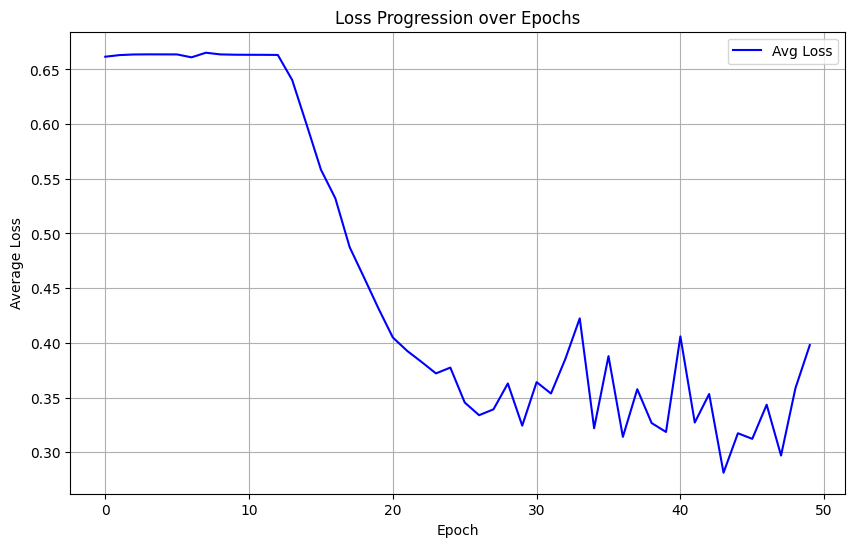

In [16]:
import matplotlib.pyplot as plt

# Plotting the loss array
plt.figure(figsize=(10, 6))
plt.plot(avg_loss_progression, label="Avg Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.title("Loss Progression over Epochs")
plt.grid(True)
plt.legend()
plt.show()


In [17]:
pred_data = []

for i in range(len(x_data)):
    curr_input = dt.Tensor([30])
    for j in range(len(x_data[0])):
        curr_input.set(j, dt.Value(x_data[i][j]))

    y_pred = model(curr_input)

    pred_output = int(y_pred.get(0).data > 0.5)
    pred_data.append(pred_output)

In [18]:
len(pred_data), len(y_data)

(569, 569)

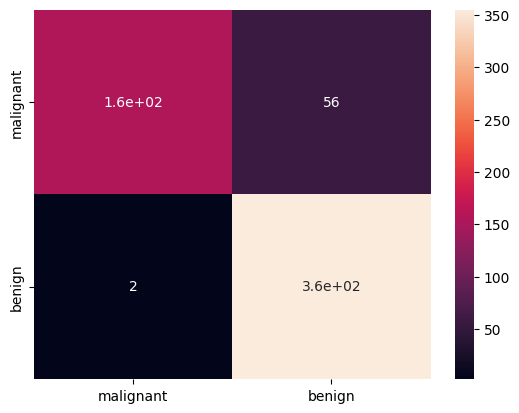

In [19]:
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

c = confusion_matrix(y_data, pred_data)
sns.heatmap(c, annot=True, xticklabels=labels, yticklabels=labels);

In [20]:
print(classification_report(y_data, pred_data))  # noqa: T201

              precision    recall  f1-score   support

           0       0.99      0.74      0.84       212
           1       0.86      0.99      0.92       357

    accuracy                           0.90       569
   macro avg       0.93      0.87      0.88       569
weighted avg       0.91      0.90      0.89       569

